In [1]:
import torch.optim as optim
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 3)
        self.fc2 = nn.Linear(3, 3)
        self.fc3 = nn.Linear(3, 1)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

In [3]:
net = Net()
X = torch.randn(1000, 2)
y = torch.randn(1000, 1)

In [4]:
torch.save(net.state_dict(), './st.pth')

In [5]:
for p in net.parameters():
    print(p.size())

torch.Size([3, 2])
torch.Size([3])
torch.Size([3, 3])
torch.Size([3])
torch.Size([1, 3])
torch.Size([1])


In [6]:
filters = [torch.tensor([[1, 2], [1, 1], [1, 1]]), torch.tensor([1, 1, 1]),
           torch.tensor([[1, 1, 2], [1, 1, 1], [2, 2, 1]]), torch.tensor([1, 1, 1]),
           torch.tensor([[1, 1, 1]]), torch.tensor([1])]

In [7]:
for f in filters:
    print(f.size())

torch.Size([3, 2])
torch.Size([3])
torch.Size([3, 3])
torch.Size([3])
torch.Size([1, 3])
torch.Size([1])


In [8]:
from ElementwiseAdam import ElementWiseAdam
elementadam = ElementWiseAdam(net.parameters(), filters)

In [9]:
criterion = nn.MSELoss()

In [10]:
loss_history = []
for e in range(100):
    elementadam.zero_grad()
    prediction = net(X)
    loss = criterion(prediction, y)
    loss_history.append(loss.item())
    loss.backward()
    elementadam.step()

In [13]:
net = Net()
net.load_state_dict(torch.load('./st.pth', weights_only=True))

<All keys matched successfully>

In [14]:
adam = optim.Adam(net.parameters())
loss_history2 = []
for e in range(100):
    adam.zero_grad()
    prediction = net(X)
    loss = criterion(prediction, y)
    loss_history2.append(loss.item())
    loss.backward()
    adam.step()

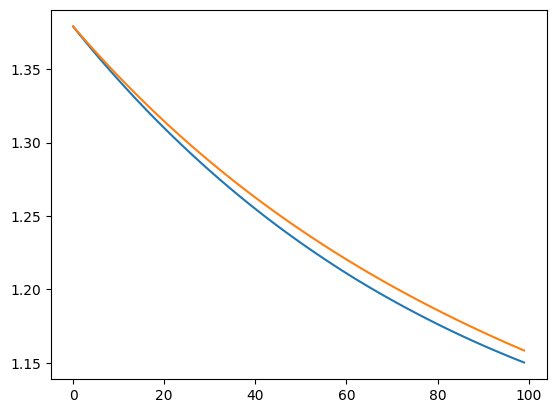

In [15]:
import matplotlib.pyplot as plt
plt.plot(loss_history)
plt.plot(loss_history2)